In [1]:
api_key = 'mdeqlkih5n1165zrzr12ef7h'
api_secret = '2i226o40eck9h9cbfp3gus6mvdc72bt5u22bf16cybje5a1071'
output_file = "data/drug_crime.csv"

Create Dataframe, filter out data looking only for controlled substance sales

In [2]:
import pandas as pd
from io import StringIO

import requests
from requests.auth import HTTPBasicAuth
from urllib.parse import quote

limit = 84838
offset = 0

filters = quote("""
                $where=pd_desc like '%CONTROLLED%SUBSTANCE%SALE%'
                """.strip(), safe=':/?&=')
print("Filters:", filters)

df = pd.DataFrame()
while True:
    url = f"""
    https://data.cityofnewyork.us/resource/qgea-i56i.csv?{filters}&$limit={limit}&$offset={offset}
    """.strip()
    response = requests.get(url, auth=HTTPBasicAuth(api_key, api_secret))

    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df_temp = pd.read_csv(csv_data)

        # If df is not empty, append the new data
        if not df_temp.empty:
            print(f"Retrieved {offset + limit} records")
            df = pd.concat([df, df_temp])
            offset += limit
        else:
            break
    else:
        raise Exception(f"Failed to retrieve data. Status code: {response.status_code}", response.json())
    
# Save to file
df.to_csv(output_file, index=False)
print("Saved to file", output_file)


Filters: %24where=pd_desc%20like%20%27%25CONTROLLED%25SUBSTANCE%25SALE%25%27


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
import pandas as pd
df = pd.read_csv(output_file)

Keep only used columns

In [4]:
print("Cols", df.columns)
df.head()

Cols Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
0,279732887,2023-12-30T00:00:00.000,20:00:00,2023-12-30T00:00:00.000,20:15:00,46,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,520,...,M,NaN,40.858387,-73.900566,"(40.858387, -73.900566)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,E
1,279727230,2023-12-24T00:00:00.000,18:38:00,2023-12-24T00:00:00.000,18:38:00,108,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,512,...,M,NaN,40.747120,-73.942382,"(40.747120382561384, -73.94238226542083)",PATROL BORO QUEENS NORTH,(null),UNKNOWN,UNKNOWN,E
2,279714402,2023-12-30T00:00:00.000,11:48:00,2023-12-30T00:00:00.000,11:49:00,5,2023-12-30T00:00:00.000,117,DANGEROUS DRUGS,521,...,M,NaN,40.716337,-74.001251,"(40.716337, -74.001251)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E
3,279667030,2023-12-29T00:00:00.000,05:38:00,NaN,(null),52,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,F,11.0,40.867475,-73.897402,"(40.86747548737554, -73.8974019488641)",PATROL BORO BRONX,KINGSBRIDGE ROAD,UNKNOWN,UNKNOWN,E
4,279682885,2023-12-29T00:00:00.000,14:18:00,2023-12-29T00:00:00.000,14:18:00,120,2023-12-29T00:00:00.000,117,DANGEROUS DRUGS,512,...,M,NaN,40.626931,-74.077901,"(40.62693137888209, -74.07790054905978)",PATROL BORO STATEN ISLAND,(null),UNKNOWN,UNKNOWN,E


In [5]:
# Keep only subset of columns
df = df[['cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm', 'latitude', 'longitude', 'susp_race']]

Create visualization
- when complaint is made by
    - hour
    - month


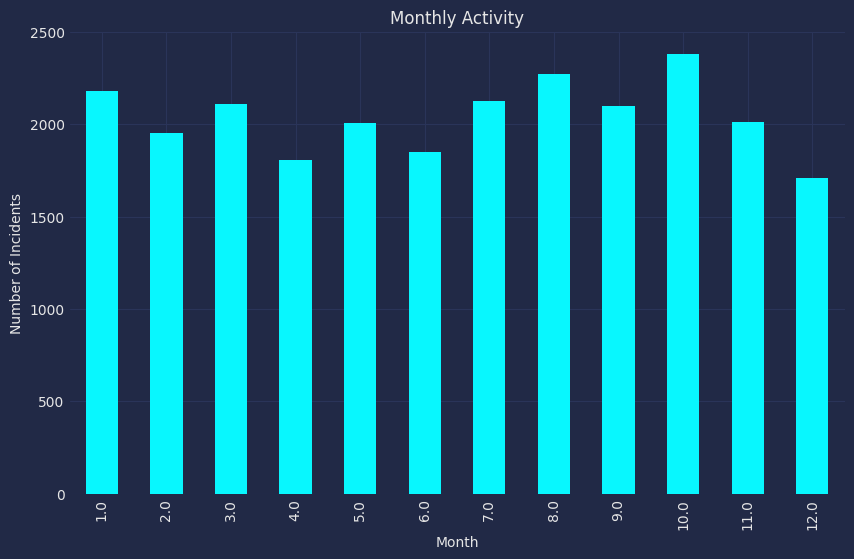

/tmp/ipykernel_33216/2366943308.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['cmplnt_fr_tm'] = pd.to_datetime(df['cmplnt_fr_tm'])


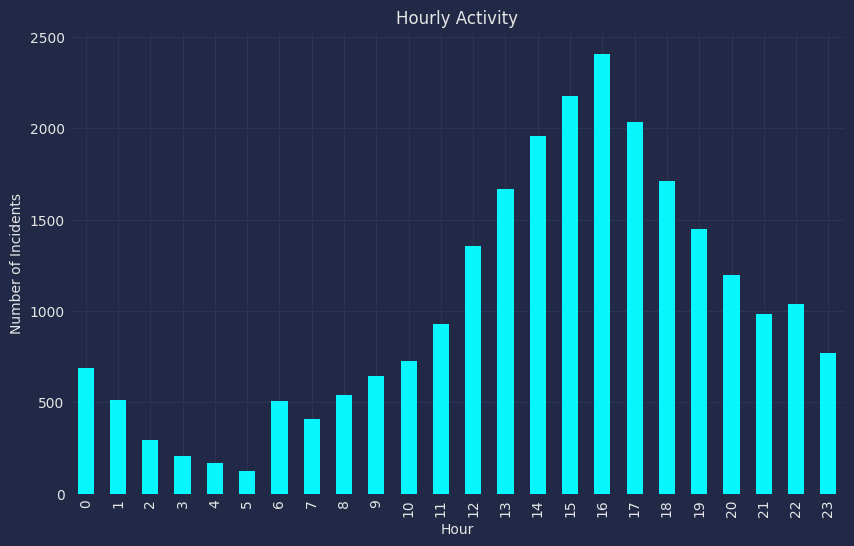

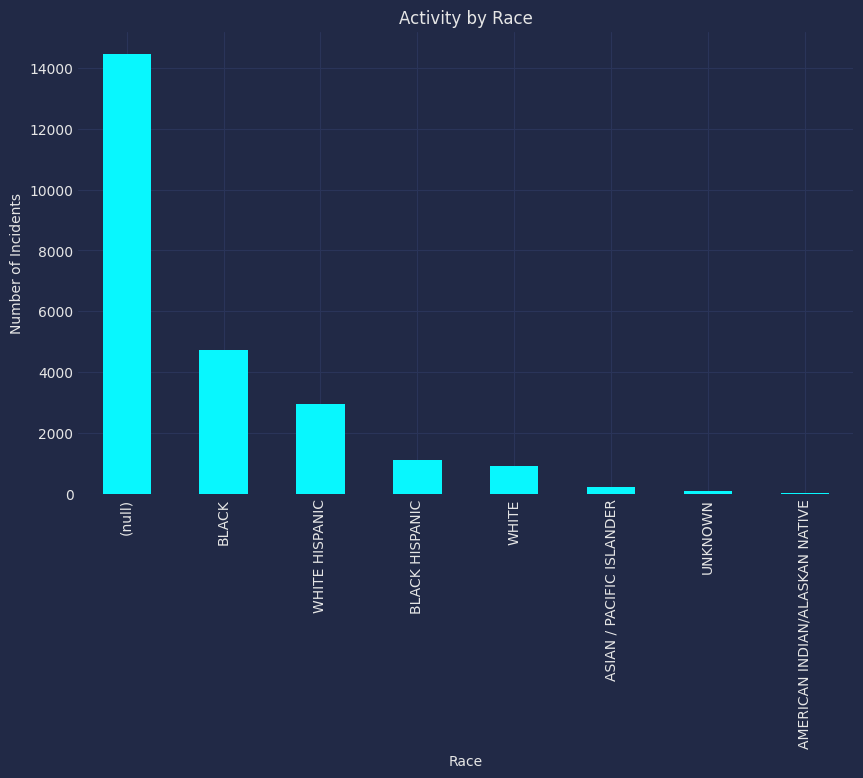

In [6]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use('cyberpunk')
# Monthly Activity
plt.figure(figsize=(10, 6))
df['cmplnt_fr_dt'] = pd.to_datetime(df['cmplnt_fr_dt'])
monthly_activity = df['cmplnt_fr_dt'].dt.month.value_counts().sort_index()
monthly_activity.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Activity')
plt.show()

# Hourly Activity
plt.figure(figsize=(10, 6))
df['cmplnt_fr_tm'] = pd.to_datetime(df['cmplnt_fr_tm'])
hourly_activity = df['cmplnt_fr_tm'].dt.hour.value_counts().sort_index()
hourly_activity.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.title('Hourly Activity')
plt.show()

# Activity by Race
plt.figure(figsize=(10, 6))
race_activity = df['susp_race'].value_counts()
race_activity.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Number of Incidents')
plt.title('Activity by Race')
plt.show()